#**Proyecto final para Data Analytics -Python.** 
Elaborado por: Johana Rangel

<img src="https://github.com/johanarangel/analytics_proyecto_jr/blob/main/delitos.jpg?raw=true" width="1200" align="middle">



In [37]:
import os
import platform
import io

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import datetime
from datetime import date

#Recolección datos.

<img src="https://github.com/johanarangel/analytics_proyecto_jr/blob/main/pipeline.jpg?raw=true" width="1200" align="middle">

In [38]:
if os.access('delitos_2018.csv', os.F_OK) is False: 
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/johanarangel/analytics_proyecto_jr/main/delitos_2018.csv > delitos_2018.csv
    else:
        !wget delitos_2018.csv https://raw.githubusercontent.com/johanarangel/analytics_proyecto_jr/main/delitos_2018.csv

# **delitos_2018.csv:**
El dataset **`delitos_2018.csv`** contiene cuatro diferentes tipos de delitos que ocurrieron en el 2018 en diferentes barrios de la Capital Federal de Buenos Aires. El objetivo es dado la hora, dia, mes y barrio al clasificarlo pueda predecir el tipo de delito que pueda ocurrir en el barrio.<br> [Dataset source](https://cdn.buenosaires.gob.ar/datosabiertos/datasets/mapa-del-delito/delitos_2018.csv)

- **id** --> identificador
- **fecha** --> fecha del hecho en formato (año, mes, día )
- **franja_horaria** --> hora en formato de 24hs
- **tipo_delito** --> cuatro tipo, ejemplo Hurto (sin violencia)
- **cantidad_registrada** --> frecuencia de un tipo de delito por día
- **comuna** --> número que agrupa diferntes barrios.
- **barrio** --> nombre de cada barrio donde ocurren los tipos de delitos, ejemplo Almagro
- **lat** --> valor de latitud, ejemplo -34.624523
- **long** --> valor de longitud, ejemplo -58.502294

In [39]:
df = pd.read_csv("delitos_2018.csv")

In [40]:
df

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,269335,2018-01-01,23,Hurto (sin violencia),NaN,1.0,10.0,Vélez Sársfield,-34.624523,-58.502294
1,248498,2018-01-01,20,Hurto (sin violencia),Hurto Automotor,1.0,8.0,Villa Lugano,-34.669643,-58.464153
2,248172,2018-01-01,14,Hurto (sin violencia),Hurto Automotor,1.0,8.0,Villa Lugano,-34.680992,-58.465303
3,301417,2018-01-01,11,Robo (con violencia),NaN,1.0,13.0,Belgrano,-34.571114,-58.464845
4,272732,2018-01-01,22,Hurto (sin violencia),NaN,1.0,4.0,Barracas,-34.646857,-58.380158
...,...,...,...,...,...,...,...,...,...,...
123728,367221,2018-12-31,16,Robo (con violencia),NaN,1.0,8.0,Villa Lugano,-34.673199,-58.492690
123729,367220,2018-12-31,16,Robo (con violencia),NaN,1.0,7.0,Parque Chacabuco,-34.635321,-58.427876
123730,367224,2018-12-31,16,Robo (con violencia),NaN,1.0,11.0,Villa Gral. Mitre,-34.613216,-58.469575
123731,367223,2018-12-31,2,Robo (con violencia),NaN,1.0,4.0,Parque Patricios,-34.638746,-58.401177


#Procesar datos.

<img src="https://github.com/johanarangel/analytics_proyecto_jr/blob/main/pipeline_1.jpg?raw=true" width="1200" align="middle">

In [41]:
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,id,cantidad_registrada,comuna,lat,long
count,123733.000000,123733.000000,118433.000000,118433.000000,118433.000000
mean,308975.241698,1.000081,7.337288,-34.611762,-58.435581
std,35808.424988,0.009848,4.634766,0.029709,0.042480
min,195828.000000,1.000000,1.000000,-34.703796,-58.531336
25%,278081.000000,1.000000,3.000000,-34.631304,-58.468900
50%,309014.000000,1.000000,7.000000,-34.610155,-58.433187
75%,339947.000000,1.000000,12.000000,-34.592856,-58.400570
max,370889.000000,3.000000,15.000000,-34.531016,-58.342665
Nan,0.000000,0.000000,5300.000000,5300.000000,5300.000000
%Nan,0.000000,0.000000,4.283417,4.283417,4.283417


In [42]:
df.shape[0]

123733

In [43]:
df1 = df.dropna()
print('Cantidad de filas a analizar:', df1.shape[0])

Cantidad de filas a analizar: 16637


In [44]:
df2 = df1.copy()

In [45]:
# Separando la fecha en dia, mes, año
df_fecha = df2["fecha"].str.split('-', expand=True)
df_fecha.head()

,0,1,2
1,2018,01,01
2,2018,01,01
5,2018,01,01
9,2018,01,01
13,2018,01,01


In [47]:
df2['mes_delito'] = df_fecha[(1)]
df2['dia_delito'] = df_fecha[(2)]
df2.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long,mes_delito,dia_delito
1,248498,2018-01-01,20,Hurto (sin violencia),Hurto Automotor,1.0,8.0,Villa Lugano,-34.669643,-58.464153,01,01
2,248172,2018-01-01,14,Hurto (sin violencia),Hurto Automotor,1.0,8.0,Villa Lugano,-34.680992,-58.465303,01,01
5,311108,2018-01-01,22,Robo (con violencia),Robo Automotor,1.0,10.0,Villa Luro,-34.634817,-58.497742,01,01
9,270248,2018-01-01,15,Hurto (sin violencia),Hurto Automotor,1.0,1.0,San Nicolás,-34.603694,-58.387963,01,01
13,260918,2018-01-01,18,Hurto (sin violencia),Hurto Automotor,1.0,14.0,Palermo,-34.595470,-58.418537,01,01


In [48]:
# Convirtiendo los valores string  de las columnas franja_horaria, dia_delito, mes_delito en formato numérico.
s = pd.Series(df2['franja_horaria'])
df2['franja_horaria'] = pd.to_numeric(s, errors='coerce')

In [49]:
s = pd.Series(df2['dia_delito'])
df2['dia_delito'] = pd.to_numeric(s, errors='coerce')

In [50]:
s = pd.Series(df2['mes_delito'])
df2['mes_delito'] = pd.to_numeric(s, errors='coerce')

In [51]:
df3 = df2.drop(['id', 'fecha', 'comuna', 'lat', 'long', 'subtipo_delito', 'cantidad_registrada'], axis=1)
df3.tail()

,franja_horaria,tipo_delito,barrio,mes_delito,dia_delito
123696,16.0,Lesiones,Palermo,12,31
123700,13.0,Hurto (sin violencia),Floresta,12,31
123702,16.0,Hurto (sin violencia),San Telmo,12,31
123704,8.0,Hurto (sin violencia),Mataderos,12,31
123706,15.0,Hurto (sin violencia),Flores,12,31


In [52]:
df4 = df3.reindex()
df4

,franja_horaria,tipo_delito,barrio,mes_delito,dia_delito
1,20.0,Hurto (sin violencia),Villa Lugano,1,1
2,14.0,Hurto (sin violencia),Villa Lugano,1,1
5,22.0,Robo (con violencia),Villa Luro,1,1
9,15.0,Hurto (sin violencia),San Nicolás,1,1
13,18.0,Hurto (sin violencia),Palermo,1,1
...,...,...,...,...,...
123696,16.0,Lesiones,Palermo,12,31
123700,13.0,Hurto (sin violencia),Floresta,12,31
123702,16.0,Hurto (sin violencia),San Telmo,12,31
123704,8.0,Hurto (sin violencia),Mataderos,12,31


In [53]:
df4['barrio'].value_counts()

Flores               992
Palermo              932
Caballito            782
Balvanera            780
Mataderos            712
Villa Lugano         696
Almagro              696
Villa Crespo         534
Parque Chacabuco     506
Belgrano             471
Barracas             468
Villa Devoto         442
Recoleta             440
Liniers              436
Parque Avellaneda    436
Boedo                425
Villa Urquiza        395
Saavedra             384
Nueva Pompeya        378
San Cristóbal        346
Villa Soldati        288
Constitución         282
Monserrat            279
Parque Patricios     278
Villa del Parque     274
Villa Luro           267
Nuñez                265
Floresta             261
San Nicolás          237
Vélez Sársfield      234
Retiro               224
Monte Castro         221
Villa Santa Rita     217
Villa Gral. Mitre    211
Boca                 209
Villa Pueyrredón     209
Chacarita            204
Colegiales           181
Paternal             140
Villa Riachuelo      137


In [54]:
df4['tipo_delito'].value_counts()

Lesiones                 7947
Hurto (sin violencia)    5719
Robo (con violencia)     2705
Homicidio                 266
Name: tipo_delito, dtype: int64

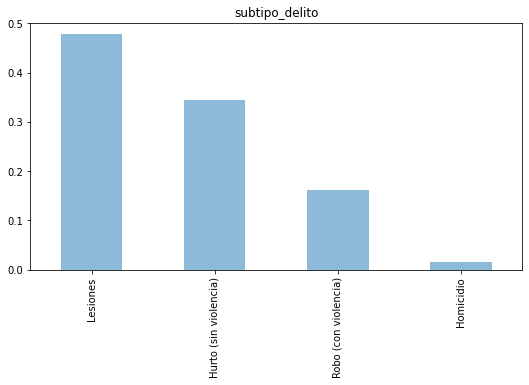

In [55]:
plt.figure(figsize=(30,10))
plt.subplot2grid((2,3), (0,0))
df4.tipo_delito.value_counts(normalize= True).plot(kind='bar', alpha=0.5)
plt.title('subtipo_delito')
plt.show()

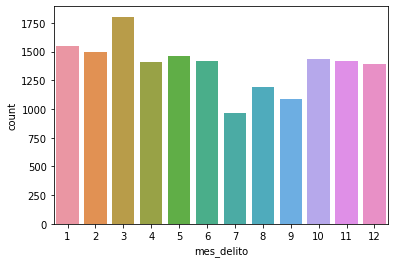

In [56]:
ax = sns.countplot(data=df4, x="mes_delito")

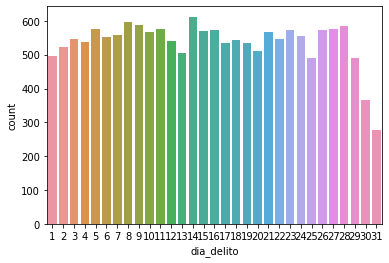

In [58]:
ax = sns.countplot(data=df4, x="dia_delito")

In [59]:
grupo_cross = pd.crosstab(df4.tipo_delito, df4.barrio)
grupo_cross

barrio,Agronomía,Almagro,Balvanera,Barracas,Belgrano,Boca,Boedo,Caballito,Chacarita,Coghlan,Colegiales,Constitución,Flores,Floresta,Liniers,Mataderos,Monserrat,Monte Castro,Nueva Pompeya,Nuñez,Palermo,Parque Avellaneda,Parque Chacabuco,Parque Chas,Parque Patricios,Paternal,Puerto Madero,Recoleta,Retiro,Saavedra,San Cristóbal,San Nicolás,San Telmo,Versalles,Villa Crespo,Villa Devoto,Villa Gral. Mitre,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,Vélez Sársfield
tipo_delito,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Homicidio,1,2,12,13,6,4,3,6,4,0,4,11,27,2,12,8,4,1,7,4,6,6,5,0,5,1,4,10,16,3,9,9,4,1,4,3,2,15,2,2,3,0,3,3,9,7,1,2
Hurto (sin violencia),26,305,172,143,178,91,169,315,41,33,80,64,278,110,172,253,47,93,95,100,344,128,146,46,98,32,2,117,32,126,97,40,23,30,196,185,70,366,102,41,99,23,53,76,105,175,116,86
Lesiones,56,301,550,203,259,68,139,327,145,26,84,176,442,116,190,273,205,80,172,127,528,171,154,39,133,92,20,288,159,215,194,184,82,59,310,161,109,161,114,76,75,68,55,96,85,182,95,103
Robo (con violencia),9,88,46,109,28,46,114,134,14,6,13,31,245,33,62,178,23,47,104,34,54,131,201,8,42,15,2,25,17,40,46,4,24,19,24,93,30,154,49,6,32,32,26,42,89,31,62,43


In [60]:
df4.groupby(['barrio', 'franja_horaria', 'mes_delito', 'dia_delito'])['tipo_delito'].value_counts()

barrio           franja_horaria  mes_delito  dia_delito  tipo_delito          
Agronomía        0.0             6           27          Robo (con violencia)     1
                                 9           18          Hurto (sin violencia)    1
                                             25          Lesiones                 1
                                 10          20          Hurto (sin violencia)    1
                                 12          17          Lesiones                 1
                                                                                 ..
Vélez Sársfield  23.0            7           18          Hurto (sin violencia)    4
                                 10          19          Lesiones                 1
                                 12          14          Hurto (sin violencia)    1
                                             19          Hurto (sin violencia)    1
                                             27          Robo (con violencia)    

In [61]:
df4_grupo = df4.groupby(['barrio'])['tipo_delito'].value_counts()
df4_grupo

barrio            tipo_delito          
Agronomía         Lesiones                  56
                  Hurto (sin violencia)     26
                  Robo (con violencia)       9
                  Homicidio                  1
Almagro           Hurto (sin violencia)    305
                                          ... 
Villa del Parque  Homicidio                  1
Vélez Sársfield   Lesiones                 103
                  Hurto (sin violencia)     86
                  Robo (con violencia)      43
                  Homicidio                  2
Name: tipo_delito, Length: 189, dtype: int64

In [62]:
df4_grupo = df4.groupby(['barrio', 'dia_delito', 'mes_delito', 'franja_horaria'])['tipo_delito'].sum()
df4_grupo.head()

barrio     dia_delito  mes_delito  franja_horaria
Agronomía  1           8           21.0                           Lesiones
                       11          22.0                           Lesiones
           2           2           22.0              Hurto (sin violencia)
                       3           22.0              Hurto (sin violencia)
           3           8           13.0                           Lesiones
Name: tipo_delito, dtype: object

In [63]:
df4.head(3)

,franja_horaria,tipo_delito,barrio,mes_delito,dia_delito
1,20.0,Hurto (sin violencia),Villa Lugano,1,1
2,14.0,Hurto (sin violencia),Villa Lugano,1,1
5,22.0,Robo (con violencia),Villa Luro,1,1


#Explorar datos.

<img src="https://github.com/johanarangel/analytics_proyecto_jr/blob/main/pipeline_2.jpg?raw=true" width="1200" align="middle">

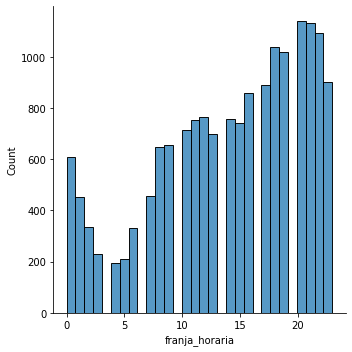

In [64]:
sns.displot(data=df4, x='franja_horaria')

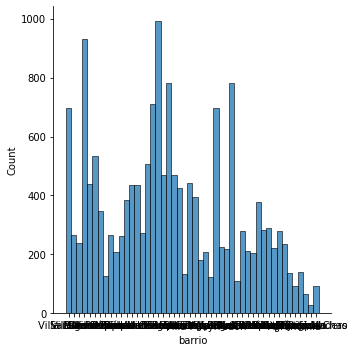

In [65]:
sns.displot(data=df4, x='barrio')

In [66]:
df4

,franja_horaria,tipo_delito,barrio,mes_delito,dia_delito
1,20.0,Hurto (sin violencia),Villa Lugano,1,1
2,14.0,Hurto (sin violencia),Villa Lugano,1,1
5,22.0,Robo (con violencia),Villa Luro,1,1
9,15.0,Hurto (sin violencia),San Nicolás,1,1
13,18.0,Hurto (sin violencia),Palermo,1,1
...,...,...,...,...,...
123696,16.0,Lesiones,Palermo,12,31
123700,13.0,Hurto (sin violencia),Floresta,12,31
123702,16.0,Hurto (sin violencia),San Telmo,12,31
123704,8.0,Hurto (sin violencia),Mataderos,12,31


In [67]:
from sklearn.preprocessing import LabelEncoder

df_cod = df4.copy()

In [68]:
df_cod.head(3)

,franja_horaria,tipo_delito,barrio,mes_delito,dia_delito
1,20.0,Hurto (sin violencia),Villa Lugano,1,1
2,14.0,Hurto (sin violencia),Villa Lugano,1,1
5,22.0,Robo (con violencia),Villa Luro,1,1


In [69]:
df_copy = df_cod.copy()
# LabelEncoder
le = LabelEncoder()
label_encoding_barrio = le.fit_transform(df_copy['barrio'])
label_encoding_barrio

array([37, 37, 38, ..., 32, 15, 12])

In [70]:
df_cod['barrio'] = label_encoding_barrio

In [71]:
df_cod

,franja_horaria,tipo_delito,barrio,mes_delito,dia_delito
1,20.0,Hurto (sin violencia),37,1,1
2,14.0,Hurto (sin violencia),37,1,1
5,22.0,Robo (con violencia),38,1,1
9,15.0,Hurto (sin violencia),31,1,1
13,18.0,Hurto (sin violencia),20,1,1
...,...,...,...,...,...
123696,16.0,Lesiones,20,12,31
123700,13.0,Hurto (sin violencia),13,12,31
123702,16.0,Hurto (sin violencia),32,12,31
123704,8.0,Hurto (sin violencia),15,12,31


In [72]:
df5 = df_cod.dropna()
print('Cantidad de filas a analizar:', df5.shape[0])

Cantidad de filas a analizar: 16623


In [73]:
df5.head()

,franja_horaria,tipo_delito,barrio,mes_delito,dia_delito
1,20.0,Hurto (sin violencia),37,1,1
2,14.0,Hurto (sin violencia),37,1,1
5,22.0,Robo (con violencia),38,1,1
9,15.0,Hurto (sin violencia),31,1,1
13,18.0,Hurto (sin violencia),20,1,1


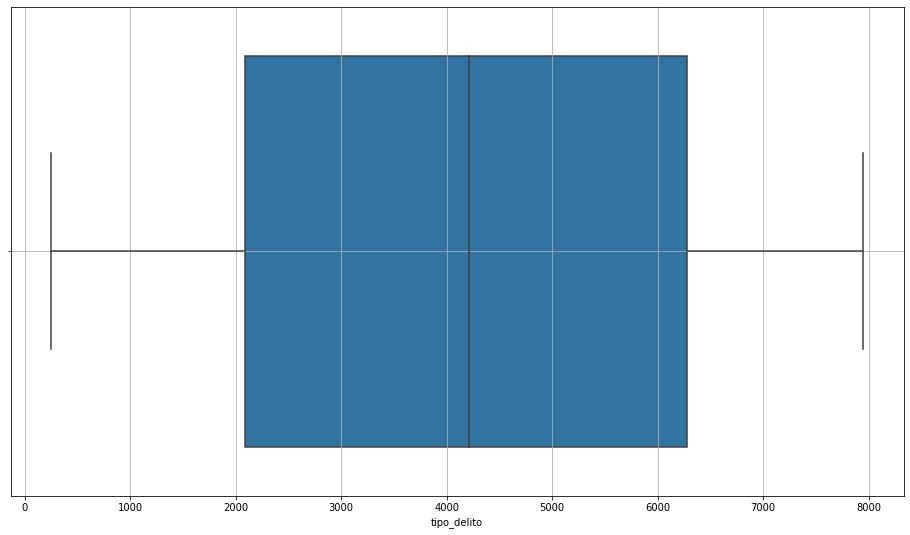

In [75]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
sns.boxplot(x=df5['tipo_delito'].value_counts(), ax=ax)
ax.grid('dashed')

In [76]:
df6 = df5.copy()

In [77]:
df6['Tipo_Delito'] = df6['tipo_delito']

In [78]:
df7 = df6.drop(['tipo_delito'], axis=1)
df7

,franja_horaria,barrio,mes_delito,dia_delito,Tipo_Delito
1,20.0,37,1,1,Hurto (sin violencia)
2,14.0,37,1,1,Hurto (sin violencia)
5,22.0,38,1,1,Robo (con violencia)
9,15.0,31,1,1,Hurto (sin violencia)
13,18.0,20,1,1,Hurto (sin violencia)
...,...,...,...,...,...
123696,16.0,20,12,31,Lesiones
123700,13.0,13,12,31,Hurto (sin violencia)
123702,16.0,32,12,31,Hurto (sin violencia)
123704,8.0,15,12,31,Hurto (sin violencia)


In [79]:
df7.dtypes

franja_horaria    float64
barrio              int64
mes_delito          int64
dia_delito          int64
Tipo_Delito        object
dtype: object

#Entrenar modelo

<img src="https://github.com/johanarangel/analytics_proyecto_jr/blob/main/pipeline_4.png?raw=true" width="1200" align="middle">

In [80]:
X = df7.drop('Tipo_Delito', axis=1).values
y = df7['Tipo_Delito'].values

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
# Modelo base
class RandomBaseModel():
    def __init__(self):
        self.classes_ = [0, 1]
    def fit(self,X, y):
        self.classes_ = np.unique(y)
        return None

    def predict(self,X):
        rand = np.random.randint(0, len(self.classes_), size=X.shape[0])
        rand_clases = [self.classes_[x] for x in rand]
        return np.asarray(rand_clases)

In [83]:
# Obtener la salida según el modelo base
random_model = RandomBaseModel()
random_model.fit(X_train, y_train)
y_hat_base = random_model.predict(X_test)
random_model.classes_

array(['Homicidio', 'Hurto (sin violencia)', 'Lesiones',
       'Robo (con violencia)'], dtype=object)

#### KNN

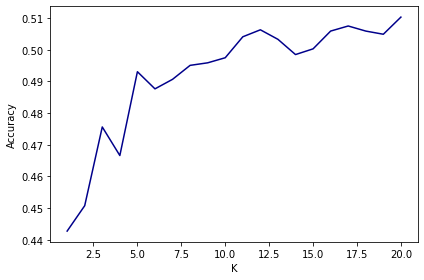

La mejor exactitud se obtuvo con 0.51 con K=20


In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

K_MAX = 20
mean_acc = np.zeros((K_MAX))

for i in range(K_MAX):
    # Entrenar el modelo
    clf = KNeighborsClassifier(n_neighbors=(i+1)).fit(X_train,y_train)

    # Prediccion
    y_hat = clf.predict(X_test)   

    # Evaluar el modelo
    mean_acc[i] = accuracy_score(y_test, y_hat)

plt.plot(range(1, K_MAX+1), mean_acc,'darkBlue')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.tight_layout()
plt.show()

print(f"La mejor exactitud se obtuvo con {mean_acc.max():.2f} con K={mean_acc.argmax()+1}")

In [85]:
clf = KNeighborsClassifier(n_neighbors=13).fit(X_train,y_train)
y_hat = clf.predict(X_test)   

# Validar modelo

<img src="https://github.com/johanarangel/analytics_proyecto_jr/blob/main/pipeline_5.png?raw=true" width="1200" align="middle">

In [86]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat_base, normalize=True)

0.25185482253860036

In [87]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.503308602366152

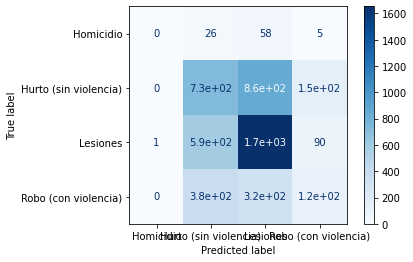

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

#Utilizar el modelo

<img src="https://github.com/johanarangel/analytics_proyecto_jr/blob/main/pipeline_6.png?raw=true" width="1200" align="middle">

In [89]:
# dado los siguientes datos
hora = 23
barrio = 'Vélez Sársfield'
mes = 7
dia = 18

In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


barrio_data = np.array([[barrio]])

label_encoding_barrio = LabelEncoder()
integer_encoded = label_encoding_barrio.fit_transform(barrio_data)
print(integer_encoded)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
# proceso para extraer el valor del array
norm_barrio = integer_encoded[0]
# valor_barrio = norm_barrio[0]
print(norm_barrio)


0


In [92]:
# Utilizamos float para convertir la matriz que retorna el scaler
# a un número

dia_norm = float(np.array([[dia]]))
mes_norm = float(np.array([[mes]]))
hora_norm = float(np.array([[hora]]))

# El sistema espera como entrada "X" en este caso una sola fila pero varias
# columnas, por eso el reshape(1, -1) donde el "-1" significa "varias"
# (el sistema determina cuantas)

X_prueba = np.array([hora_norm, norm_barrio, mes_norm, dia_norm]).reshape(1, -1)
print('Shape:', X_prueba.shape)
print('Valores:\n', X_prueba)


Shape: (1, 4)
Valores:
 [[23.  0.  7. 18.]]


In [93]:
mi_categoria = clf.predict(X_prueba)
mi_categoria

array(['Hurto (sin violencia)'], dtype=object)

In [95]:
import pickle

# Salvar el modelo
pickle.dump(clf, open('delitos_model.pkl', 'wb'))
# Salvar los codificadores
pickle.dump(label_encoding_barrio, open('label_encoding_barrio.pkl', 'wb'))

#Conclusión

En el análisis del modelo de Machine Learning se puede apreciar que en la comparación del accuracy_score entre el modelo base y modelo de clasificación se obtuvo como resultado en el caso del modelo de clasificación un valor que supera el 50% de accuracy dejando por debajo el modelo base con un 26%. Sin embargo, en la matriz de confusion se puede observar que el modelo de clasificación tiende a confundir los features correspondientes a Robo y Hurto con un margen elevado.